In [15]:
#Math stuff
from numpy.random import seed
from numpy.random import randn
from scipy import stats
import numpy as np
import math  

#Visualization stuff
import seaborn as sns
#sns.set(style="darkgrid")
sns.set(style="whitegrid")
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

import pandas as pd
import os

#ML stuff
from sklearn import preprocessing

In [2]:
#check list of files in data 
directory = "./data/dedicated_host/coefficient_of_variation/"
print(os.listdir(directory))

['Aggregate_Summary_Dedicated_Host_11-16-2019 - Sheet2.csv']


In [3]:
#import aggregate with cv included
data = 'Aggregate_Summary_Dedicated_Host_11-16-2019 - Sheet2.csv'

In [4]:
df = pd.read_csv(directory + data, header = 1)

In [5]:
df.head()

,instanceID,setId,tenants,sysbench_wall_time,sysbench_std,sysbench_cv,ycruncher_wall_time,ycruncher_std,ycruncher_cv,pgbench_transactions,pgbench_std,pgbench_cv,bandwidthUpload,bandwitdhDownload,iperf_total,stdUp,stdDown,stdTotal,iperf_cv
0,i-0009b7735dea24732,0,48,9.046352,0.006011,0.000665,6.526652,0.064484,0.009880,123377.0000,269.838841,0.002187,612.8,566.3,1179.1,253.291575,160.911328,341.710225,0.289806
1,i-002f7e27ea3e0bc1c,0,48,9.043485,0.005964,0.000660,6.532571,0.044366,0.006791,123286.0000,553.898908,0.004493,518.3,556.9,1075.2,188.317138,184.650090,273.639585,0.254501
2,i-007e12c9530b8cdea,0,48,9.525164,0.693472,0.072804,6.523446,0.064272,0.009852,122657.6667,572.732340,0.004669,371.3,486.5,857.8,143.431013,136.416234,236.250244,0.275414
3,i-008e6f72c7403b5d3,0,48,9.041284,0.004991,0.000552,6.487584,0.065375,0.010077,123779.6667,193.717148,0.001565,594.9,482.1,1077.0,178.835399,75.426859,231.176219,0.214648
4,i-00ba7a56c944e5a25,0,48,9.042799,0.005881,0.000650,6.568983,0.087642,0.013342,123144.0000,246.032518,0.001998,859.6,762.3,1621.9,369.176621,400.885146,720.323916,0.444124


In [6]:
df_cv= df[['tenants', 'sysbench_cv', 'ycruncher_cv', 'pgbench_cv', 'iperf_cv' ]]

In [27]:
df_cv

,tenants,sysbench_cv,ycruncher_cv,pgbench_cv,iperf_cv
0,48,0.000665,0.009880,0.002187,0.289806
1,48,0.000660,0.006791,0.004493,0.254501
2,48,0.072804,0.009852,0.004669,0.275414
3,48,0.000552,0.010077,0.001565,0.214648
4,48,0.000650,0.013342,0.001998,0.444124
5,48,0.000725,0.010384,0.005155,0.351228
6,48,0.000416,0.010644,0.000677,0.215089
7,48,0.000485,0.010058,0.003560,0.241555
8,48,0.000818,0.004933,0.005541,0.702874
9,48,0.000979,0.020208,0.003689,0.336699


In [8]:
#group by tenants?
df_mean = df_cv.groupby('tenants').mean()

In [19]:
#adjust for percentage
df_mean = df_mean * 100

In [10]:
sns.set(font_scale=1.6)

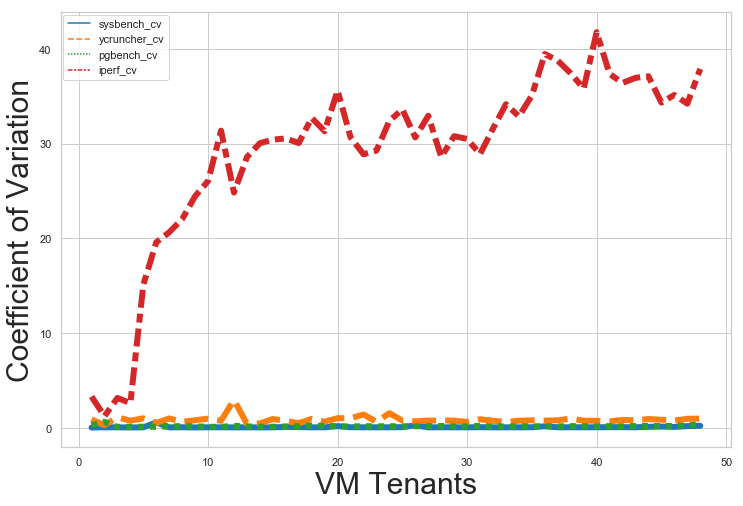

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
data_plot = df_mean

sns.lineplot(data=data_plot, palette="tab10", linewidth=6)
plt.legend(bbox_to_anchor=(0., 1), loc=2, borderaxespad=0.2)

ax.set_xlabel("VM Tenants", fontsize=30)
ax.set_ylabel("Coefficient of Variation", fontsize=30)


plt.show()

<h3>What happens if we remove iperf</h3>

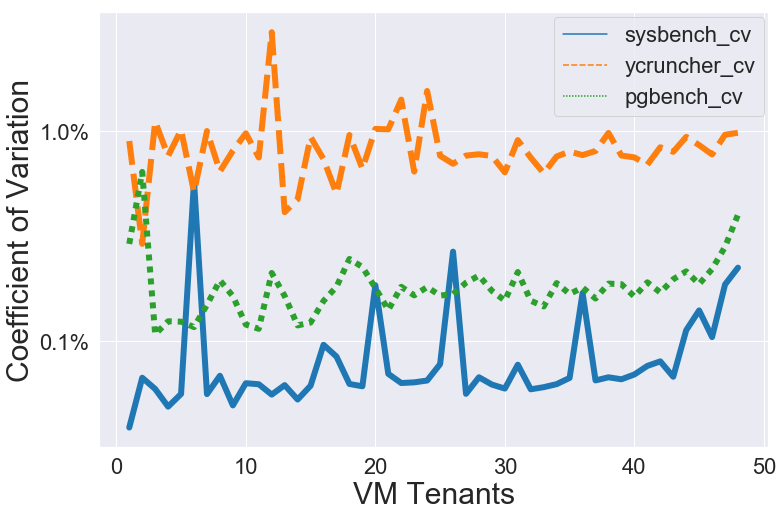

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
data_plot = df_mean[['sysbench_cv', 'ycruncher_cv', 'pgbench_cv']]

sns.lineplot(data=data_plot, palette="tab10", linewidth=6)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.2)

ax.set_xlabel("VM Tenants", fontsize=30)
ax.set_ylabel("Coefficient of Variation", fontsize=30)

ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))

plt.show()

<h3>Change Y-axis to Log</h3>

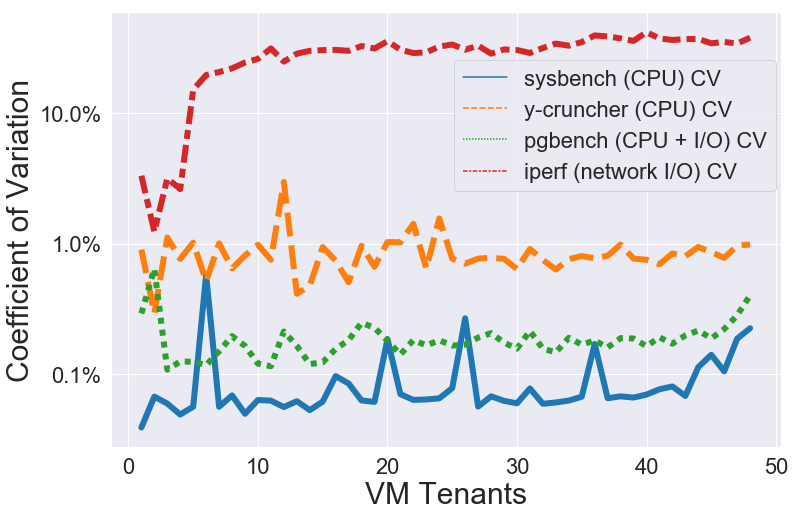

In [39]:
sns.set(font_scale=2)

#log scale

sns

fig, ax = plt.subplots(figsize=(12, 8))
data_plot = df_mean
data_plot = data_plot.rename(columns= {'sysbench_cv': "sysbench (CPU) CV", 'ycruncher_cv': "y-cruncher (CPU) CV", 
                                       'pgbench_cv': 'pgbench (CPU + I/O) CV', 'iperf_cv':'iperf (network I/O) CV'})



sns.lineplot(data=data_plot, palette="tab10", linewidth=6)
plt.legend(bbox_to_anchor=(1, 0.9), loc=1, borderaxespad=0.2)

ax.set_xlabel("VM Tenants", fontsize=30)
ax.set_ylabel("Coefficient of Variation", fontsize=30)
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))

plt.show()

<h5>From the graph above, we can see that the benchmarks' stability relative to CV from most stable to least is:<h5>
    <ol>
        <li>sysbench</li>
        <li>pgbench</li>
        <li>y-cruncher</li>
        <li>iperf</li>
    </ol>
    